In [1]:
# importing the module packages

from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import earthpy as et

In [2]:
# handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# dealing with errors thrown by one of the plots
matplotlib_axes_logger.setLevel("ERROR")
import warnings
warnings.filterwarnings('ignore')

# adjusting fontsixe with seaborn
sns.set(font_scale=1.5, style='whitegrid')

In [3]:
# reading the precipitation dataset
precip_data = pd.read_csv(
    "C:/Users/Juliance/Desktop/Earth_DS/Earth-Studies/precip-daily-2003-2013.csv",
    parse_dates=['DATE'],
    na_values=999.99,
    index_col='DATE'
)
precip_data.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [4]:
# subset time series data by time case year 2005 & remove missing values
data_2005 = precip_data['2005'].dropna()

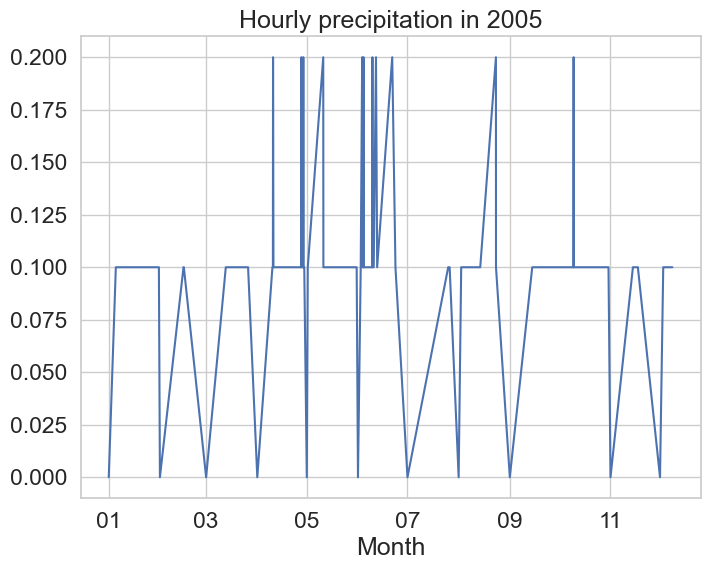

In [5]:
# hourly precipitation
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_2005.index.values, data_2005['HPCP'])
ax.xaxis.set_major_formatter(DateFormatter("%m"))
plt.title("Hourly precipitation in 2005")
plt.xlabel("Month")
plt.show()

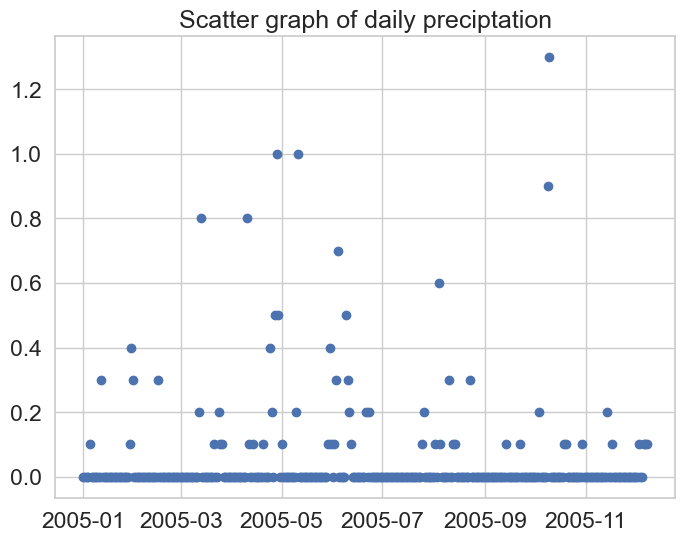

In [6]:
# draw plot of daily sums precipitation
data_D = data_2005.resample("D").sum()

fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x=data_D.index.values,
        y=data_D['HPCP'])
plt.title("Scatter graph of daily preciptation")
plt.show()

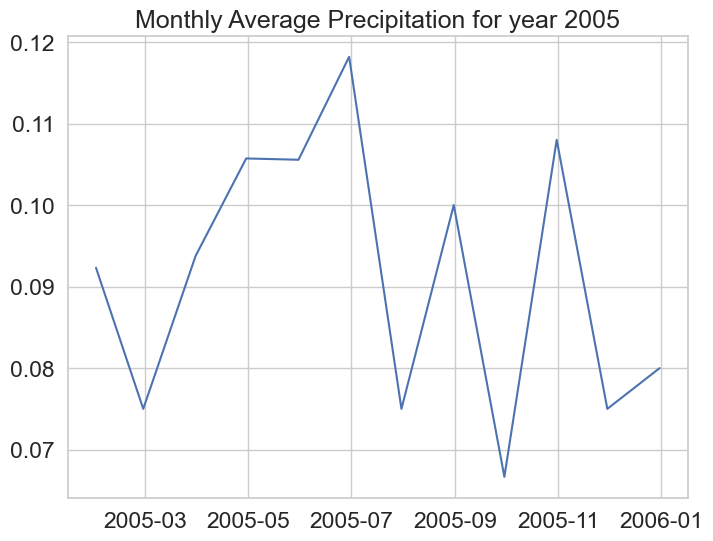

In [7]:
# draw plot of monthly average precipitation
data_m = data_2005.resample("M").mean()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_m.index.values, data_m['HPCP'])
ax.set_title("Monthly Average Precipitation for year 2005")
plt.show()


In [8]:
# reading the data
earth_data = pd.read_csv('C:/Users/Juliance/Desktop/Earth_DS/Earth-Studies/805325-precip-dailysum-2003-2013.csv',
                            parse_dates=['DATE'], index_col='DATE', na_values=['999.99'])
earth_data.head()


,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-01-05,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-02-02,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
2003-02-03,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34


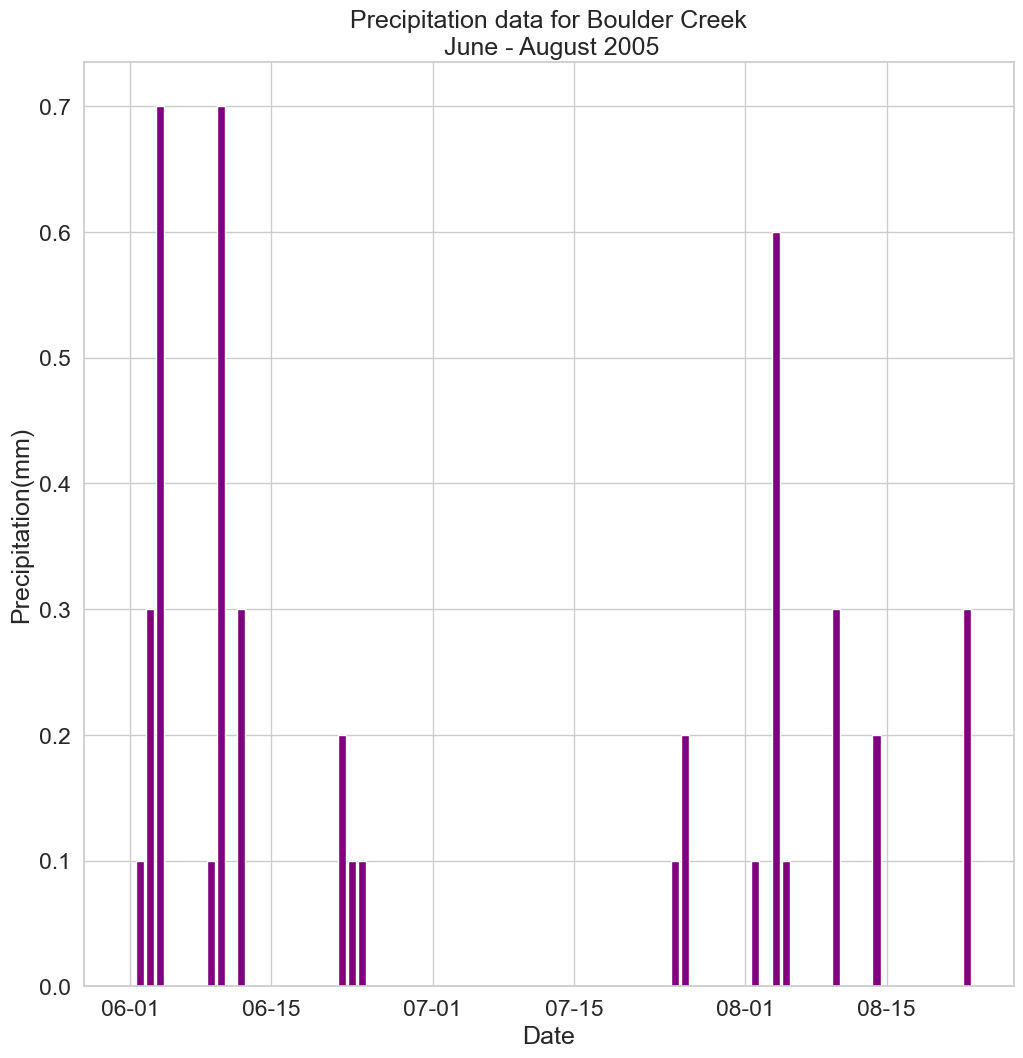

In [9]:
# subset the data to get June August 2005 data
earth_data_05 = earth_data['2005-06-01':'2005-08-31']

# creating the plot
fig, ax = plt.subplots(figsize=(12,12))
ax.bar(earth_data_05.index.values,
       earth_data_05['DAILY_PRECIP'],
       color='purple')

# formatting the date using the DateFormatter
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

# set the labels
plt.title('Precipitation data for Boulder Creek\n June - August 2005')
ax.set_xlabel("Date")
ax.set_ylabel('Precipitation(mm)')
plt.show() 


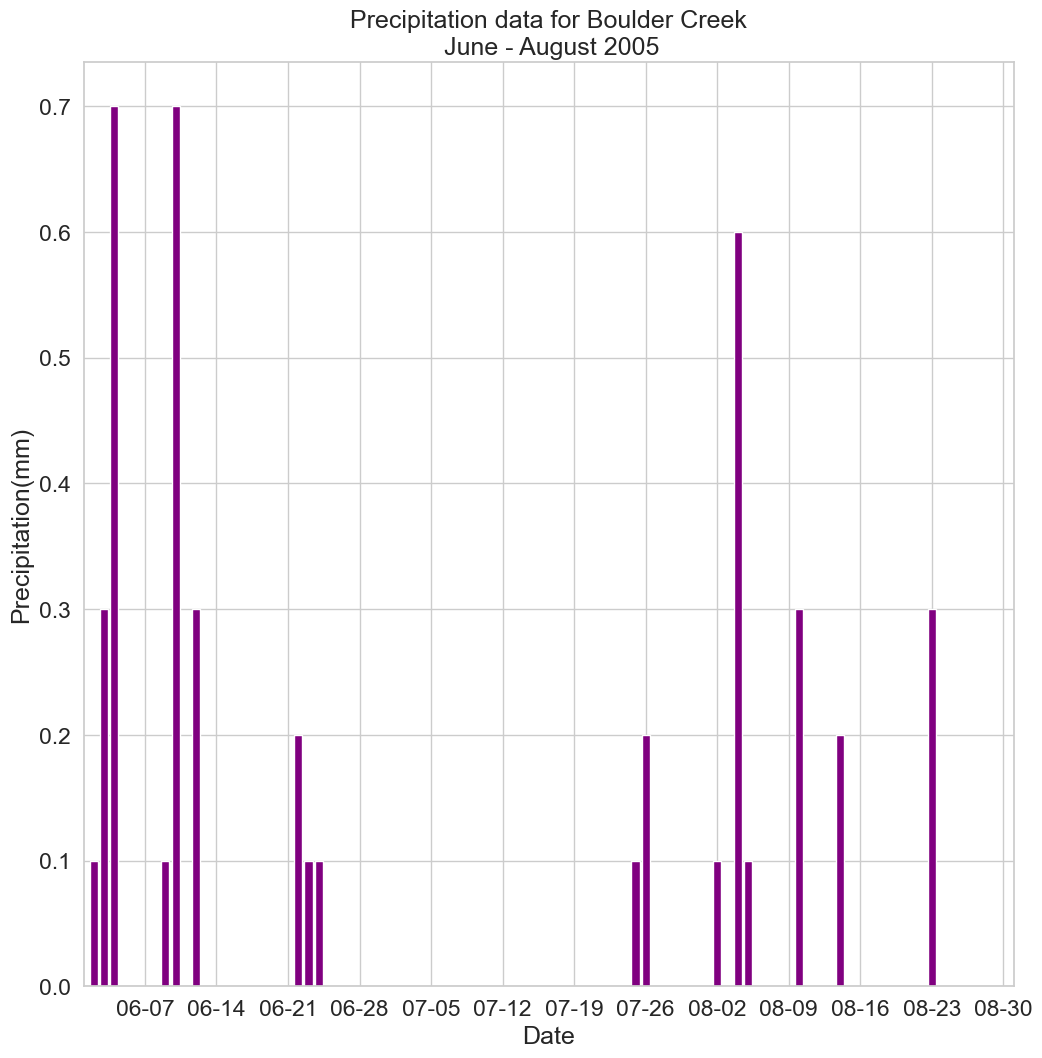

In [10]:
# adding extra customization using the set_major_locator() for the ticks
# creating the plot
fig, ax = plt.subplots(figsize=(12,12))
ax.bar(earth_data_05.index.values,
       earth_data_05['DAILY_PRECIP'],
       color='purple')

# formatting the date using the DateFormatter
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

# formatting the xticks
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xlim(["2005-06-01", "2005-08-31"])

# set the labels
plt.title('Precipitation data for Boulder Creek\n June - August 2005')
ax.set_xlabel("Date")
ax.set_ylabel('Precipitation(mm)')
plt.show()

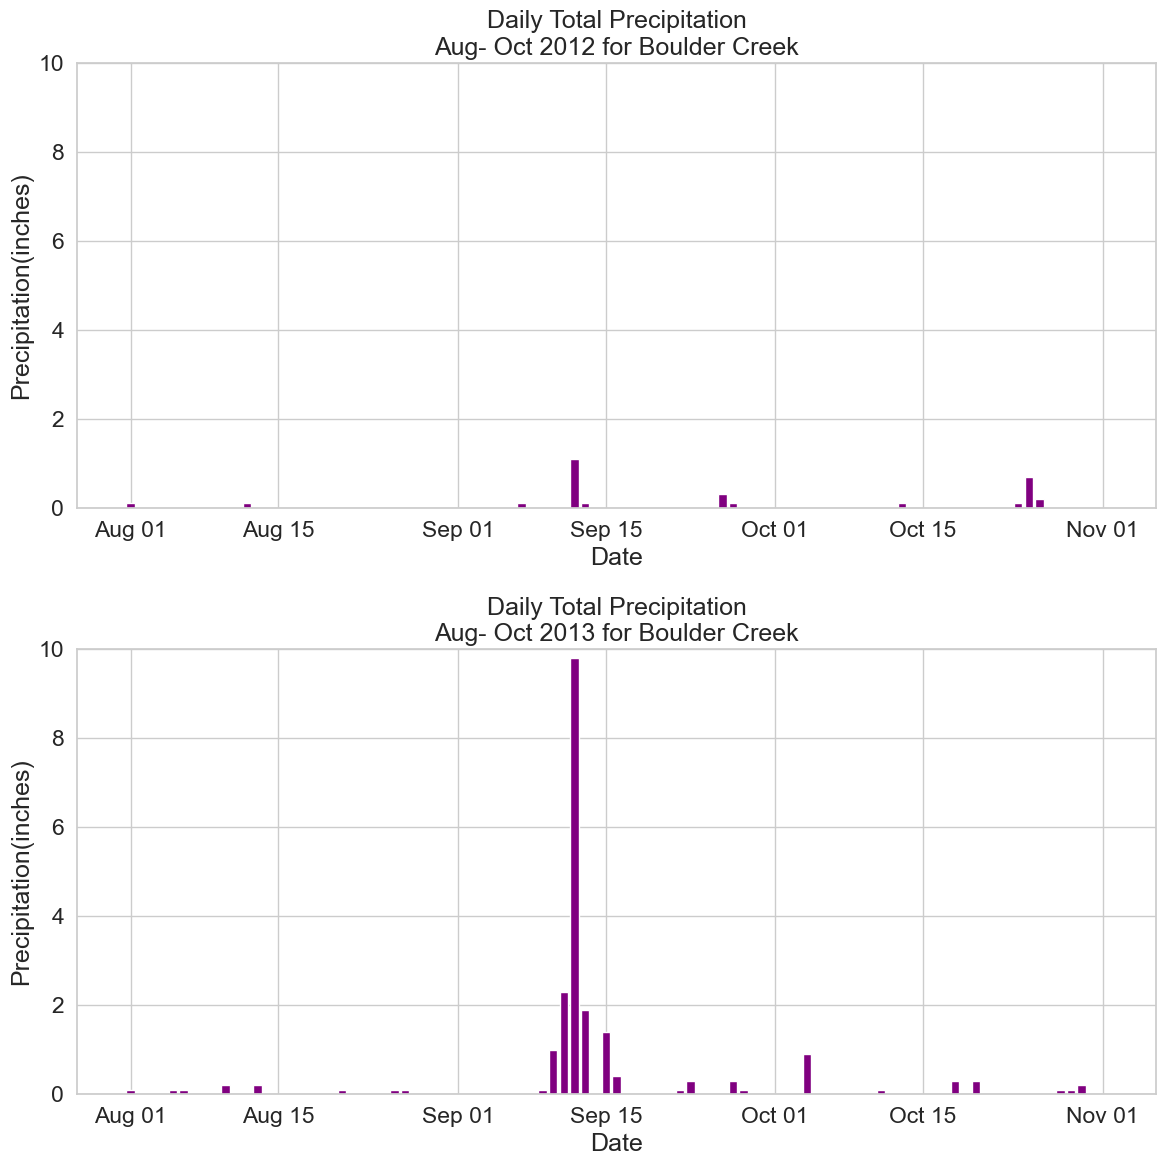

In [11]:
# How different was the rainfall in 2012 compared to 2013?
# To compare, we create plots for September 2013 flood and the year before the flood(2012) for same time month.

# subset the data
sep_2012 = earth_data['2012-08-01':'2012-11-01']
sep_2013 = earth_data['2013-08-01':'2013-11-01']

# plotting on the 2 graphs for comparison
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,12))


ax1.bar(
    sep_2012.index.values,
    sep_2012['DAILY_PRECIP'],
    color='purple'
)
ax1.set(
    title='Daily Total Precipitation\nAug- Oct 2012 for Boulder Creek',
    xlabel = 'Date',
    ylabel ='Precipitation(inches)',
    ylim= [0,10]
)
ax2.bar(
    sep_2013.index.values,
    sep_2013['DAILY_PRECIP'],
    color='purple'
)
ax2.set(
    title='Daily Total Precipitation\nAug- Oct 2013 for Boulder Creek',
    xlabel = 'Date',
    ylabel ='Precipitation(inches)',
    ylim=[0,10]
)
 # set the format for the x axes
ax1.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax2.xaxis.set_major_formatter(DateFormatter('%b %d'))

plt.tight_layout()
plt.show()

In [15]:
# reading and analyzing the discharge time series data from Colorado from 1983 to 2013

dis = pd.read_csv('C:/Users/Juliance/Desktop/Earth_DS/colorado-flood/discharge/06730200-discharge-daily-1986-2013.csv',
                    parse_dates=['datetime'], index_col='datetime')
dis.head()

,agency_cd,site_no,disValue,qualCode
datetime,,,,
1986-10-01,USGS,6730200,30.0,A
1986-10-02,USGS,6730200,30.0,A
1986-10-03,USGS,6730200,30.0,A
1986-10-04,USGS,6730200,30.0,A
1986-10-05,USGS,6730200,30.0,A


In [18]:
dis.describe()

,site_no,disValue
count,9954.0,9954.000000
mean,6730200.0,93.712645
std,0.0,143.942426
min,6730200.0,0.870000
25%,6730200.0,32.000000
50%,6730200.0,54.000000
75%,6730200.0,108.000000
max,6730200.0,4770.000000


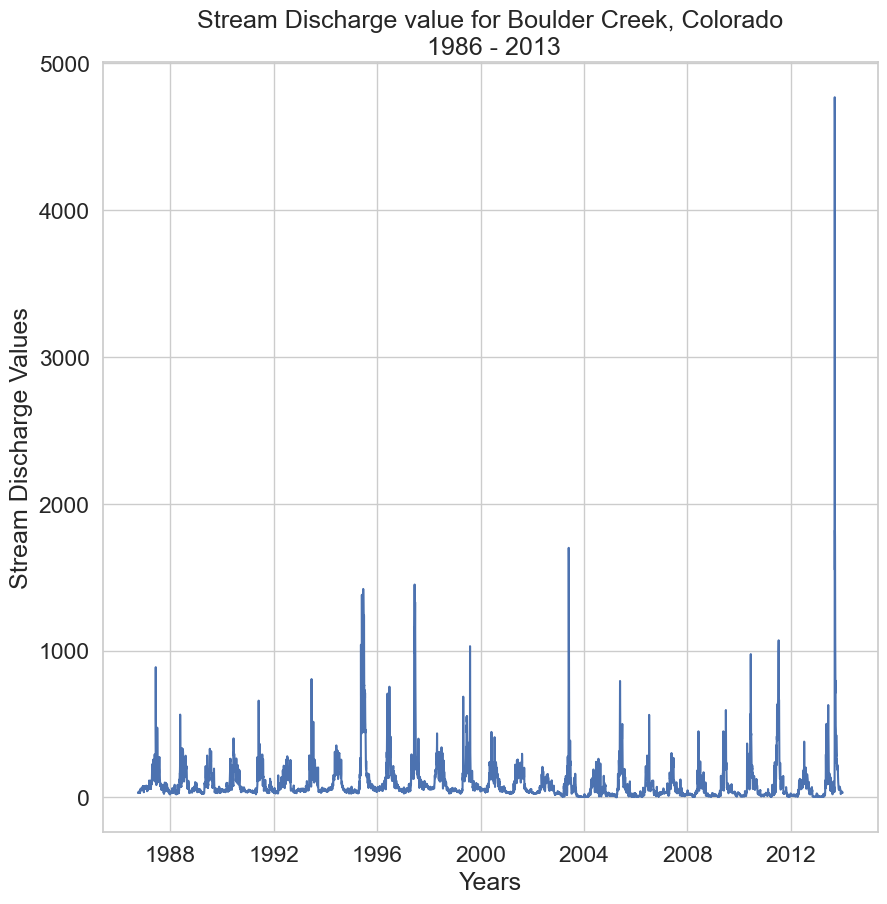

In [20]:
# plotting the discharge over time using matplotlib
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(dis.index.values, dis['disValue'])
ax.set_xlabel('Years')
ax.set_ylabel("Stream Discharge Values")
plt.title('Stream Discharge value for Boulder Creek, Colorado\n 1986 - 2013')
plt.show()



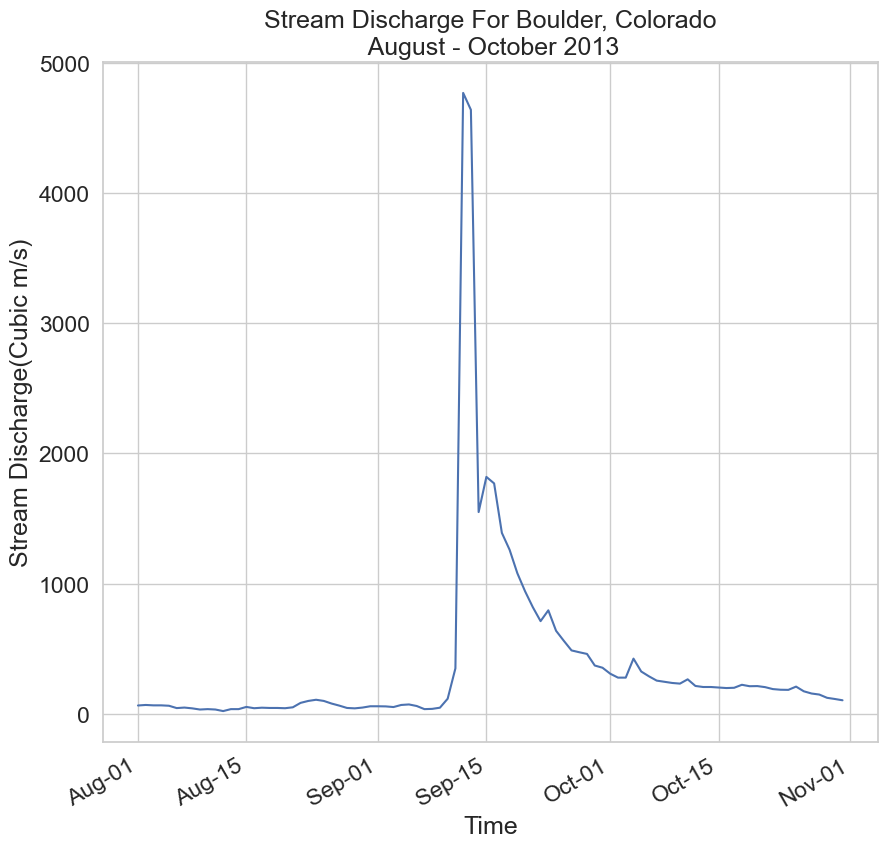

In [26]:
# since the flood occured in 2013, we can focus the time period when the flood occured.
# subsetting the data to include only discharge data from August 1st, 2013 through October 31, 2013

dis_2013 = dis['2013-08-01':'2013-10-31']

# plotting the subset dataset
f, ax = plt.subplots(figsize=(10,10))

ax.plot(dis_2013.index.values, dis_2013['disValue'])
ax.xaxis.set_major_formatter(DateFormatter("%b-%d"))
f.autofmt_xdate()
ax.set_xlabel('Time')
ax.set_ylabel('Stream Discharge(Cubic m/s)')
ax.set_title('Stream Discharge For Boulder, Colorado\n August - October 2013')
plt.show()

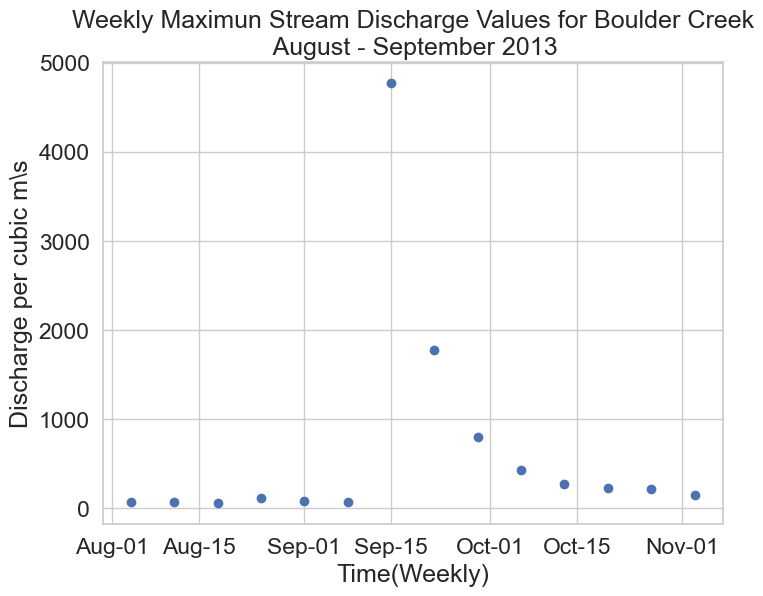

In [32]:
# resapmling the dataset by week
dis_w = dis_2013.resample('W').max()

# plotting the resampled data using a scatterplot
f,ax = plt.subplots(figsize=(8,6))

ax.scatter(x=dis_w.index.values, y='disValue', data=dis_w)
ax.xaxis.set_major_formatter(DateFormatter("%b-%d"))
ax.set_title("Weekly Maximun Stream Discharge Values for Boulder Creek\n August - September 2013")
ax.set_xlabel('Time(Weekly)')
ax.set_ylabel("Discharge per cubic m\s")
plt.show()

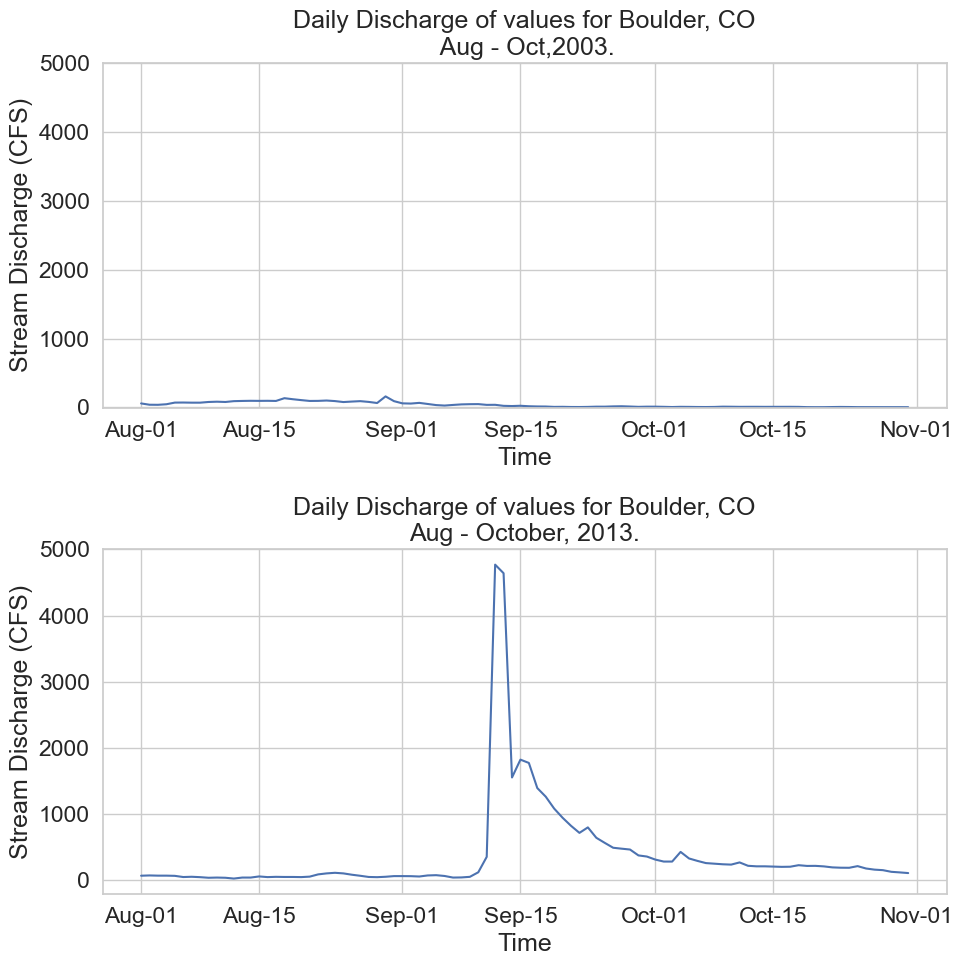

In [42]:
# comparing two months side by side
# Month 1 from August 1st, 2003 - October 31st, 2003
# Month 2 from August 1st, 2013 - October 31st, 2013 (Already have subset the data)

dis_2003 = dis['2003-08-01':'2003-10-31']

# plotting the data for the 2 months
f,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10))

ax1.plot(dis_2003.index.values,dis_2003['disValue'])
ax1.set_ylim(top=5000)
ax1.xaxis.set_major_formatter(DateFormatter('%b-%d'))
ax1.set_xlabel("Time")
ax1.set_ylabel("Stream Discharge (CFS)")
ax1.set_title('Daily Discharge of values for Boulder, CO\n Aug - Oct,2003.')

ax2.plot(dis_2013.index.values, dis_2013['disValue'])
ax2.set_ylim(top=5000)
ax2.xaxis.set_major_formatter(DateFormatter('%b-%d'))
ax2.set_xlabel("Time")
ax2.set_ylabel("Stream Discharge (CFS)")
ax2.set_title('Daily Discharge of values for Boulder, CO\nAug - October, 2013.')

plt.tight_layout()
plt.show()